In [1]:
from PYME.LMVis.pipeline import Pipeline as pipeline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def SRM_density_plot_2D(points_fn, radius_increment, spindle_size, x0, y0):
    """
    Parameters
    ----------
    points_fn : file name, string
    radius_increment : nm
    spindle_size : estimated spindle size, nm
    """
    
    points = pipeline(points_fn)
    print('Point cloud data loaded')
    
    x1, y1 = 189, 1334
    ps = 5e4/1163
    xc = (x0-x1)*ps
    yc = (y1-y0)*ps
    print(xc, yc)
    points_x = points['x']
    points_y = points['y']
    points_z = points['z']
    mid_z = (points_z.min() + points_z.max())/2
    zmin = mid_z - 2e3
    zmax = mid_z + 2e3
    maskz = (points_z>=zmin) & (points_z<=zmax)
    points_x = points_x[maskz]
    points_y = points_y[maskz]
    points_z = points_z[maskz]
    radius = np.arange(radius_increment, spindle_size, radius_increment)
    mask_spindle = (points_x-xc)**2 + (points_y-yc)**2 <= spindle_size
    Npt = len(points_x[mask_spindle])
    
    distance = np.sqrt((points_x-xc)**2 + (points_y-yc)**2)
    density = []
    for r in radius:
        sig = (distance>=(r-radius_increment)) & (distance<r)
        density.append(np.count_nonzero(sig)/(np.pi*r**2-np.pi*(r-radius_increment)**2))
    density = density / np.max(density)
    
    print('Density calculated, plotting...')
    
    plt.figure(figsize=(10,4))
    plt.subplot(1, 2, 1)
#     plt.plot(points_x, points_y, '.', markersize=0.004, alpha=0.5, color='green')
    plt.scatter(points_x, points_y, c='green', s=0.01, alpha=0.2, edgecolors='none', rasterized=True)
    plt.plot(xc, yc, '.', markersize=3, color='b')
#     plt.xlim(10000, 30000)
#     plt.ylim(7000, 25000)
    plt.gca().set_aspect('equal')
    plt.subplot(1, 2, 2)
    plt.plot(radius/1e3, density, 'o', markersize=1)  # change horizontal axis unit to um
    plt.show()
    
    return radius/1e3, density          # change radius unit to um

In [3]:
path = 'F:/Acquisition_Yujin_3/Collaboration/Wu_Lab_Collaboration/Figures_raw_images/'
radius_increment = 20
spindle_size = 10000

c:\users\yb262\python-microscopy\PYME\IO\MetaDataHandler.py:672: UserWarning: DictMDHandler is not yet fully supported, and will likely cause failures for anything related to localisation fitting
  warnings.warn('DictMDHandler is not yet fully supported, and will likely cause failures for anything related to localisation fitting')


Point cloud data loaded
20421.3241616509 22012.037833190025
Density calculated, plotting...


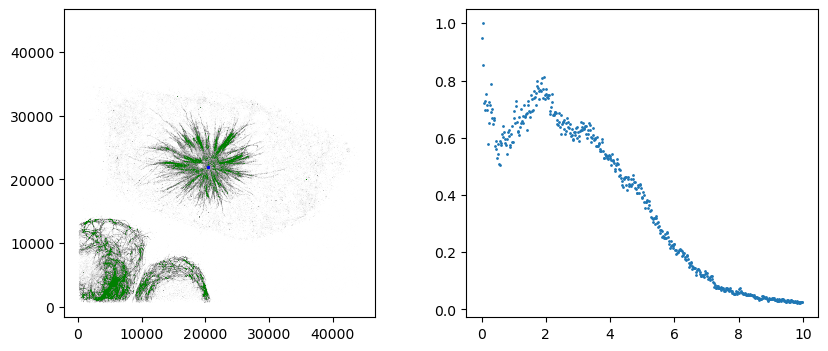

In [4]:
points_fn1 = path + 'Large_KD1_20241022_seq3.hdf'
r1, density1 = SRM_density_plot_2D(points_fn1, radius_increment, spindle_size, 664, 822)

Point cloud data loaded
24032.67411865864 21238.17712811694
Density calculated, plotting...


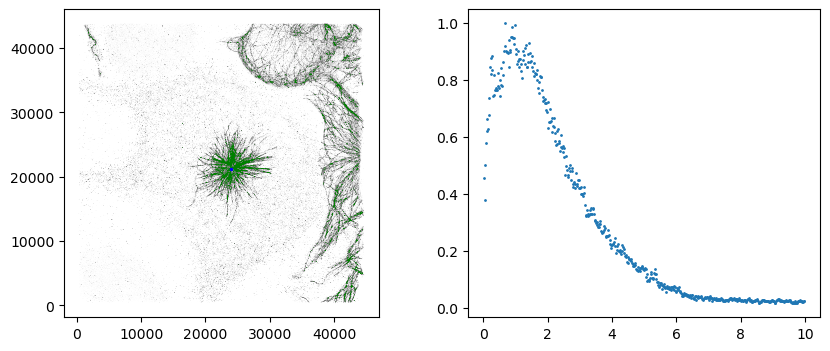

In [5]:
fw1 = path + 'Large_WT1_20240103_seq7.hdf'
r1, d1 = SRM_density_plot_2D(fw1, radius_increment, spindle_size, 748, 840)